In [1]:
import boto3
import pandas as pd

bucket = "ml-for-bem"
bucket_prefix = "hatchet"
experiment_id = "test/progressive-training-16"

s3 = boto3.client("s3")

# list all the files in the experiment directory that have "train" and "results" and "h5" in the key
files = s3.list_objects(Bucket=bucket, Prefix=f"{bucket_prefix}/{experiment_id}")[
    "Contents"
]

# filter the files to only include the ones that have "train" and "results" and "h5" in the key
train_results_files = [
    file
    for file in files
    if "train/" in file["Key"] and "results" in file["Key"] and "h5" in file["Key"]
]


file_keys = [file["Key"] for file in train_results_files]
import tempfile
from pathlib import Path

all_dfs = []
with tempfile.TemporaryDirectory() as temp_dir:
    for i, file in enumerate(file_keys):
        local_path = Path(temp_dir) / f"result_{i}.h5"
        s3.download_file(Bucket=bucket, Key=file, Filename=local_path.as_posix())
        df = pd.read_hdf(local_path.as_posix(), key="stratum_metrics")
        all_dfs.append(df)

df = pd.concat(all_dfs)
df


split_segment                                                                               train  \
stratum                                 USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.2007-2021.zip   
metric                                                                                        mae   
target                                                                           District Cooling   
sort_index progressive_training_iter_ix                                                             
0          0                                                                      3.292460          
1          0                                                                      4.799701          
2          0                                                                      1.928287          
3          0                                                                     12.132778          
4          0                                                                      9.175248          
0          1                                                                      1.610963          
1          1                                                                      0.718653          
2          1                                                                      0.876831          
3          1                                                                      1.447683          
4          1                                                                      1.238348          
0          2                                                                      0.711095          
1          2                                                                      1.497814          
2          2                                                                      0.945952          
3          2                                                                      1.431636          
4          2                                                                      1.593215          
0          3                                                                      0.824205          
1          3                                                                      2.270168          
2          3                                                                      1.896188          
3          3                                                                      2.884516          
4          3                                                                      1.348229          
0          4                                                                      1.675420          
1          4                                                                      1.630037          
2          4                                                                      1.806158          
3          4                                                                      1.472297          
4          4                                                                      3.115037          
0          5                                                                      2.513925          
1          5                                                                      2.146050          
2          5                                                                      2.146400          
3          5                                                                      1.516143          
4          5                                                                      6.353597          
0          6                                                                      3.999181          
1          6                                                                      3.302733          
2          6                                                                      2.659614          
3          6                                                                      3.487666          
4          6                                                 

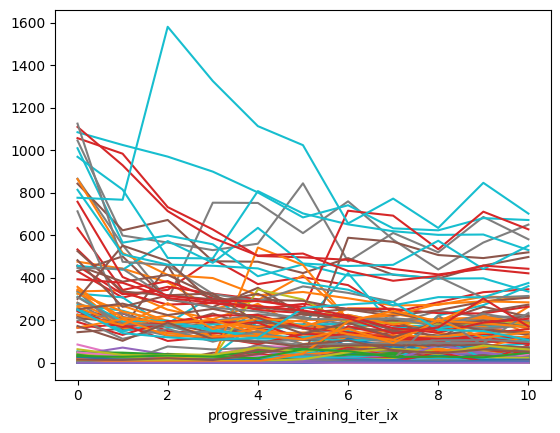

In [ ]:
maes = (
    df.groupby("progressive_training_iter_ix")
    .mean()["test"]
    .xs("rmse", level="metric", axis=1)
)
maes.plot(legend=False)
# plt.ylim(0,1)